# Data processing and graph generation for NaCl 

In [1]:
import os
import csv 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tkinter import *
from tkinter import filedialog
from matplotlib import pylab as pylab
import matplotlib.gridspec as gridspec
from scipy import signal


In [2]:
def dir_select(start_dir = None):
    '''Directory selection to later read all relevant files from directory, need tkinter and filedialog
    WARNING: do not forget '/' or '\\' (python vs win) before file name'''
    root=Tk()
    directory=filedialog.askdirectory(initialdir=start_dir)
    root.destroy()
    #print(directory)
    return directory

def all_extension_select(directory, extension):
    ''' Creates list with all files pertaining to relevant extension for the folder inserted as directory'''
    all_files_names=os.listdir(directory)
#    print(all_files_names , '\n')
    txt_files=list()
    for a in range(len(all_files_names)):
        if all_files_names[a].find(extension)>0:
            txt_files.insert(a, all_files_names[a])
    #print(txt_files)
    return txt_files

def textfile_to_linelist(txtfilepath):
    '''Creates a list of strings from the text file !!Give complete file path with directory'''
    with open(txtfilepath,  encoding='utf8', errors='ignore') as f:
        lines=f.readlines()
        f.close()
    return lines
def file_select(start_dir=None):
    root=Tk()
    filepath=filedialog.askopenfilename(initialdir=start_dir)
    root.destroy()
    return filepath

In [3]:
def OCP_to_array(filepath_list):
    '''Takes a list with the complete filepath of each OCP.txt file and returns 2lists : header and unit as well as an array with rows for data, column for data type and depth for file in the list'''
    OCP_lines=textfile_to_linelist(filepath_list[0])
    OCP_headers_str=OCP_lines[49].split('\t')
    OCP_units_str=OCP_lines[50].split('\t')
    OCP_headers_str.pop(0)
    OCP_units_str.pop(0)
    OCP_headers_str.pop(-2)
    OCP_units_str.pop(-2)
    
    
    OCP__array=np.zeros((len(OCP_lines[51:]),len(OCP_headers_str), len(filepath_list))) #array initialisation needs the first file to have already been scanned to determine row x columns size 
    for i in range(len(filepath_list)): #for each OCP file in chosen folder we need to split the read lines from the txt file into a list with the columns seperated
        OCP__lines=textfile_to_linelist(filepath_list[i])
        OCP__data=[data.split('\t') for data in OCP__lines[51:]]
        for data in OCP__data:
            data.pop(0) # We pop the empty list
            data.pop(-2)# We pop the column of text (no idea what it is)
        row=0 # Array index initiation
        file_index=i # Easier to read 
        for data in OCP__data: # For row in the data
            col=0 # Array index initiation
            for each in data: # For each entry in the row (loop over the different columns: 0 then 1 then 2 etc...) 
                each=each.replace(',', '.') # txt file contains comas instead of point which are prefered to read floats (decimals)
                each=each.replace('\n', '') # last entry has a \n character to be removed
                OCP__array[row,col, file_index]=float(each) # Filling the np array
                col+=1 # Indexation incrementation for next iteration of the loop which will look at the next data 'column'
            row+=1 # once the first row is processed we increment row index
    return OCP_headers_str , OCP_units_str , OCP__array

def EIS_to_array(filepath_list):
    '''Takes a list with the complete filepath of each EIS.txt file and returns 2lists : header and unit as well as an array with rows for data, column for data type and depth for file in the list'''
    EIS_lines=textfile_to_linelist(filepath_list[0])
    EIS_headers_str=EIS_lines[54].split('\t')
    EIS_units_str=EIS_lines[55].split('\t')
    EIS_headers_str.pop(0)
    EIS_units_str.pop(0)
    
    
    EIS__array=np.zeros((len(EIS_lines[56:]),len(EIS_headers_str), len(filepath_list)))
    for i in range(len(filepath_list)):
        EIS__lines=textfile_to_linelist(filepath_list[i])
        EIS__data=[data.split('\t') for data in EIS__lines[56:]]
        row=0
        for data in EIS__data:
            data.pop(0)
            col=0
            for each in data:
                each=each.replace(',', '.')
                each=each.replace('\n', '')
                EIS__array[row,col, i]=float(each)
                col+=1
            row+=1
    return EIS_headers_str, EIS_units_str, EIS__array

def POTDYN_to_array(filepath_list):
    '''Takes filepath list of POTDYN.txt files and returns headers, uits (lists) and data array'''
    POTDYN_lines=textfile_to_linelist(filepath_list[0])
    POTDYN_headers=POTDYN_lines[57].split('\t')
    POTDYN_units=POTDYN_lines[58].split('\t')
    POTDYN_headers.pop(0)
    POTDYN_headers.pop(-2)
    POTDYN_units.pop(0)
    POTDYN_units.pop(-2)
    
    POTDYN__array=np.zeros((len(POTDYN_lines[59:]), len(POTDYN_headers), len(filepath_list)))
    
    for i in range(len(filepath_list)):
        POTDYN__lines=textfile_to_linelist(filepath_list[i])
        POTDYN__data=[data.split('\t') for data in POTDYN__lines[59:]]
        row=0
        for data in POTDYN__data:
            data.pop(0)
            data.pop(-2)
            col=0

            for each in data:
                each=each.replace(',', '.')
                each=each.replace('\n', '')
                POTDYN__array[row,col, i]=float(each)
                col+=1
            row+=1
    return POTDYN_headers, POTDYN_units, POTDYN__array

                   
def sort_files(filepath_list):
    '''Return 4 lists: OCP# files, EIS# files from cycles OCP after cycles and POTDYN '''
    OCP_cycle_filepath_list=[]
    EIS_cycle_filepath_list=[]
    OCP_filepath_list=[]
    POTDYN_filepath_list=[]

    for file in filepath_list:
        if file.find('OCP')>0 and file.find('#')>0:
            OCP_cycle_filepath_list.append(file)
        if file.find('EIS')>0 and file.find('#')>0:
            EIS_cycle_filepath_list.append(file)
        if file.find('OCP')>0 and not file.find('#')>0:
            OCP_filepath_list.append(file)
        if file.find('POTDYN')>0:
            POTDYN_filepath_list.append(file)
    OCP_cycle_filepath_list.sort()
    EIS_cycle_filepath_list.sort()
    OCP_filepath_list.sort()
    POTDYN_filepath_list.sort()
    return OCP_cycle_filepath_list, EIS_cycle_filepath_list, OCP_filepath_list, POTDYN_filepath_list
    
    


In [33]:
#colors=['#111111', '#aa0000', '#00aa00', '#0000aa', '#aa5500', '#aa5555', '#00aa55', '#55aa55', '#5500aa', '#5555aa']
colors=["#000000","#1CE6FF","#FF34FF","#FF4A46","#008941","#006FA6","#A30059","#7A4900","#0000A6","#63FFAC","#B79762","#004D43","#8FB0FF","#997D87","#5A0007","#809693","#FEFFE6","#1B4400","#4FC601","#3B5DFF","#4A3B53","#FF2F80","#61615A","#BA0900","#6B7900","#00C2A0","#FFAA92","#FF90C9","#B903AA","#D16100","#DDEFFF","#000035","#7B4F4B","#A1C299","#300018","#0AA6D8","#013349","#00846F","#372101","#FFB500","#C2FFED","#A079BF","#CC0744","#C0B9B2","#C2FF99","#001E09","#00489C","#6F0062","#0CBD66","#EEC3FF","#456D75","#B77B68","#7A87A1","#788D66","#885578","#FAD09F","#FF8A9A","#D157A0","#BEC459","#456648","#0086ED","#886F4C","#34362D","#B4A8BD","#00A6AA","#452C2C","#636375","#A3C8C9","#FF913F","#938A81","#575329","#00FECF","#B05B6F","#8CD0FF","#3B9700","#04F757","#C8A1A1","#1E6E00","#7900D7","#A77500","#6367A9","#A05837","#6B002C","#772600","#D790FF","#9B9700","#549E79","#FFF69F","#201625","#72418F","#BC23FF","#99ADC0","#3A2465","#922329","#5B4534","#FDE8DC","#404E55","#0089A3","#CB7E98","#A4E804","#324E72","#6A3A4C","#83AB58","#001C1E","#D1F7CE","#004B28","#C8D0F6","#A3A489","#806C66","#222800","#BF5650","#E83000","#66796D","#DA007C","#FF1A59","#8ADBB4","#1E0200","#5B4E51","#C895C5","#320033","#FF6832","#66E1D3","#CFCDAC","#D0AC94","#7ED379","#012C58","#7A7BFF","#D68E01","#353339","#78AFA1","#FEB2C6","#75797C","#837393","#943A4D","#B5F4FF","#D2DCD5","#9556BD","#6A714A","#001325","#02525F","#0AA3F7","#E98176","#DBD5DD","#5EBCD1","#3D4F44","#7E6405","#02684E","#962B75","#8D8546","#9695C5","#E773CE","#D86A78","#3E89BE","#CA834E","#518A87","#5B113C","#55813B","#E704C4","#00005F","#A97399","#4B8160","#59738A","#FF5DA7","#F7C9BF","#643127","#513A01","#6B94AA","#51A058","#A45B02","#1D1702","#E20027","#E7AB63","#4C6001","#9C6966","#64547B","#97979E","#006A66","#391406","#F4D749","#0045D2","#006C31","#DDB6D0","#7C6571","#9FB2A4","#00D891","#15A08A","#BC65E9","#FFFFFE","#C6DC99","#203B3C","#671190","#6B3A64","#F5E1FF","#FFA0F2","#CCAA35","#374527","#8BB400","#797868","#C6005A","#3B000A","#C86240","#29607C","#402334","#7D5A44","#CCB87C","#B88183","#AA5199","#B5D6C3","#A38469","#9F94F0","#A74571","#B894A6","#71BB8C","#00B433","#789EC9","#6D80BA","#953F00","#5EFF03","#E4FFFC","#1BE177","#BCB1E5","#76912F","#003109","#0060CD","#D20096","#895563","#29201D","#5B3213","#A76F42","#89412E","#1A3A2A","#494B5A","#A88C85","#F4ABAA","#A3F3AB","#00C6C8","#EA8B66","#958A9F","#BDC9D2","#9FA064","#BE4700","#658188","#83A485","#453C23","#47675D","#3A3F00","#061203","#DFFB71","#868E7E","#98D058","#6C8F7D","#D7BFC2","#3C3E6E","#D83D66","#2F5D9B","#6C5E46","#D25B88","#5B656C","#00B57F","#545C46","#866097","#365D25","#252F99","#00CCFF","#674E60","#FC009C","#92896B"]
PLOT_PARAMETERS={'legend.fontsize': 'medium',
                 'figure.figsize': (5,5),
                 'axes.labelsize': 'medium',
                 'axes.titlesize': 'medium',
                 'xtick.labelsize': 'medium',
                 'ytick.labelsize': 'medium',
                 'font.size' : 14,
                 'savefig.dpi' : 200,
                 'xtick.direction' : 'in',
                 'xtick.minor.visible' : True,
                 'ytick.direction' : 'in',
                 'ytick.minor.visible' : True}
pylab.rcParams.update(PLOT_PARAMETERS)



# First: directory selection:
Select directory containing relevant .txt files

In [5]:
directory=dir_select(start_dir='/home/dasilvatousch/PydataWork/')
file_extension='.txt'
txt_files=all_extension_select(directory, file_extension)
i=0
for i in range(len(txt_files)):
    txt_files[i]=directory+'/'+txt_files[i]
    
OCP_cycle_filepaths, EIS_cycle_filepaths, OCP_filepath, POTDYN_filepath=sort_files(txt_files)



## Converting txt files to arrays for OCP cycle, EIS cycle, OCP 5min and POTDYN

In [6]:
OCP_cycle_header, OCP_cycle_units, OCP_cycle_array=OCP_to_array(OCP_cycle_filepaths)
EIS_header, EIS_units, EIS_cycle_array=EIS_to_array(EIS_cycle_filepaths)
OCP_header, OCP_units, OCP_array=OCP_to_array(OCP_filepath)
POTDYN_header, POTDYN_units, POTDYN_array=POTDYN_to_array(POTDYN_filepath)


## Plotting OCP_cycles:

In [17]:
OCP_cycle_label=[]
for each in OCP_cycle_filepaths:
    OCP_cycle_label.append(each[each.rfind('/')+1:-4])
print(OCP_cycle_label)


['OCP_#1', 'OCP_#2', 'OCP_#3', 'OCP_#4', 'OCP_#5', 'OCP_#6', 'OCP_#7', 'OCP_#8']


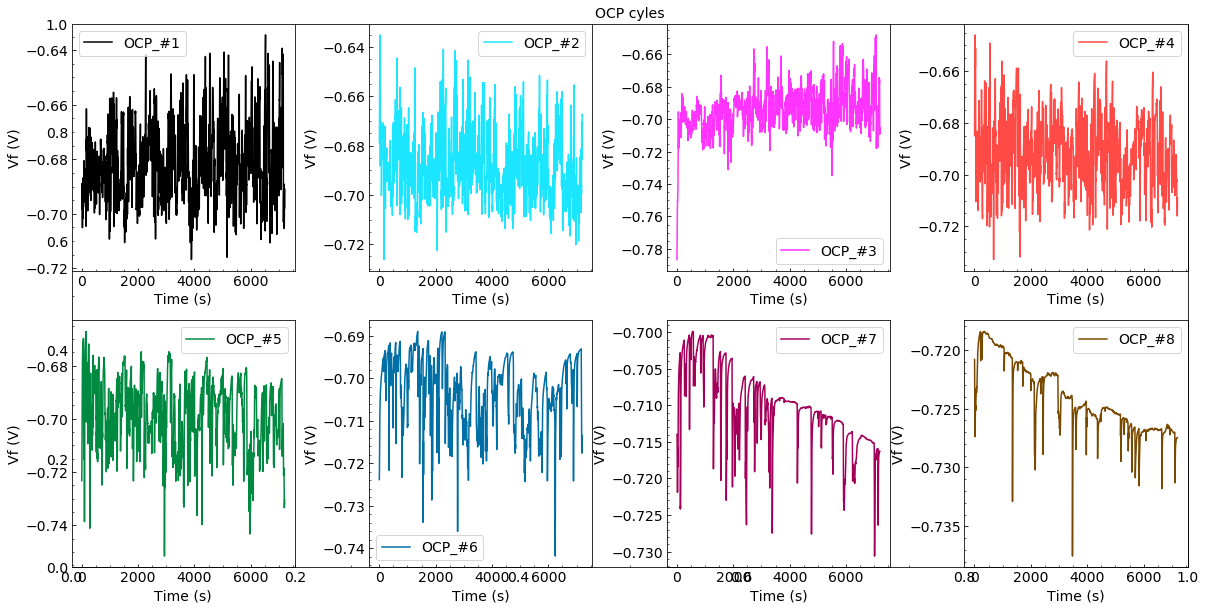

In [34]:
cfig=plt.figure(figsize=(20,10))
gd=gridspec.GridSpec(4,8)
gd.update(wspace=1, hspace=0.5)
plt.title('OCP cyles')
panel1=cfig.add_subplot(gd[0:2, 0:2])
plt.plot(OCP_cycle_array[:,1, 0], OCP_cycle_array[:,2, 0], 
         label=OCP_cycle_label[0], color=colors[0])
plt.xlabel('Time (s)')
plt.ylabel('Vf (V)')
plt.legend()

panel2=cfig.add_subplot(gd[0:2, 2:4])
plt.plot(OCP_cycle_array[:,1, 1], OCP_cycle_array[:,2, 1], 
         color=colors[1], label=OCP_cycle_label[1])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Vf (V)')

panel3=cfig.add_subplot(gd[0:2, 4:6])
plt.plot(OCP_cycle_array[:,1, 2], OCP_cycle_array[:,2, 2], 
         color=colors[2], label=OCP_cycle_label[2])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Vf (V)')

panel4=cfig.add_subplot(gd[0:2, 6:8])
plt.plot(OCP_cycle_array[:,1, 3], OCP_cycle_array[:,2, 3], 
         color=colors[3], label=OCP_cycle_label[3])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Vf (V)')

panel5=cfig.add_subplot(gd[2:4, 0:2])
plt.plot(OCP_cycle_array[:,1, 4], OCP_cycle_array[:,2, 4], 
         color=colors[4], label=OCP_cycle_label[4])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Vf (V)')

panel6=cfig.add_subplot(gd[2:4, 2:4])
plt.plot(OCP_cycle_array[:,1, 5], OCP_cycle_array[:,2, 5], 
         color=colors[5], label=OCP_cycle_label[5])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Vf (V)')

panel7=cfig.add_subplot(gd[2:4, 4:6])
plt.plot(OCP_cycle_array[:,1, 6], OCP_cycle_array[:,2, 6], 
         color=colors[6], label=OCP_cycle_label[6])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Vf (V)')

panel8=cfig.add_subplot(gd[2:4, 6:8])
plt.plot(OCP_cycle_array[:,1, 7], OCP_cycle_array[:,2, 7], 
         color=colors[7], label=OCP_cycle_label[7])
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Vf (V)')

plt.show()

## Plotting EIS cycles:

In [20]:
EIS_cycle_label=[]
for each in EIS_cycle_filepaths:
    EIS_cycle_label.append(each[each.rfind('/')+1:-4])
print(EIS_cycle_label)

['EIS_#1', 'EIS_#2', 'EIS_#3', 'EIS_#4', 'EIS_#5', 'EIS_#6', 'EIS_#7', 'EIS_#8']


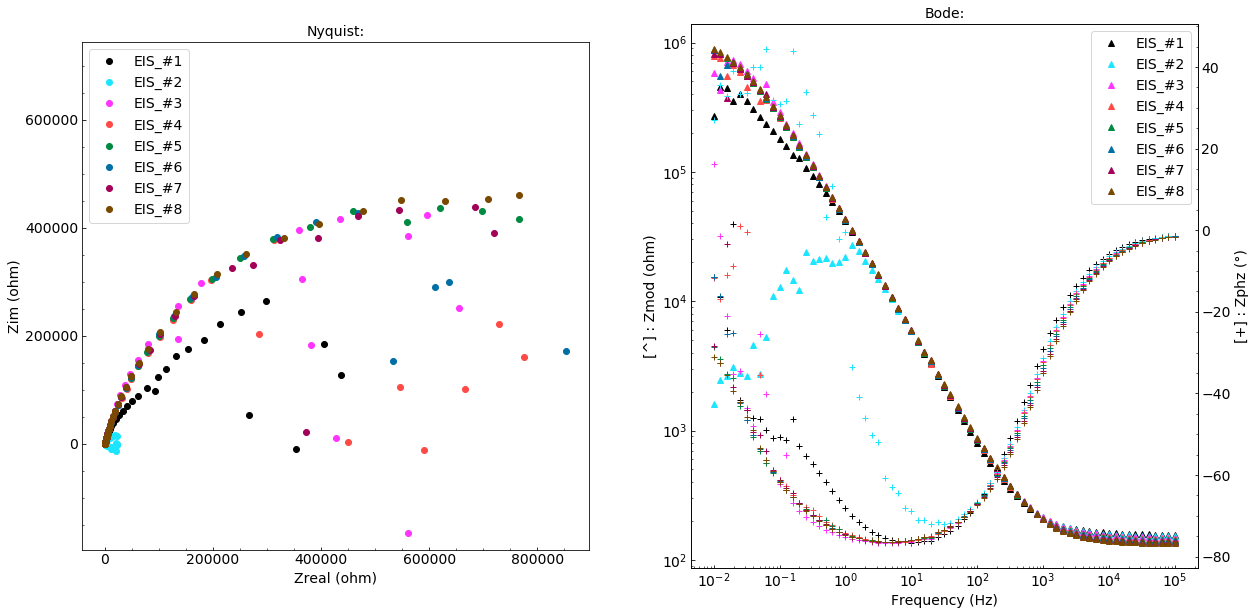

In [35]:
fig, ((ax0, ax1))= plt.subplots(1,2,figsize=(20,10))

for i in range(len(EIS_cycle_label)):
    
    ax0.plot(EIS_cycle_array[:,3, i], -EIS_cycle_array[:,4, i], label=EIS_cycle_label[i],
        color = colors[i], marker='o', linestyle='none')
ax0.set_xlabel('Zreal (ohm)')
ax0.set_ylabel('Zim (ohm)')
ax0.axis('square')
ax0.legend()
    
for i in range(len(EIS_cycle_label)):    
    ax1.plot(EIS_cycle_array[:,2, i], EIS_cycle_array[:,6, i],
            label=EIS_cycle_label[i], marker='^', linestyle='none', color=colors[i])
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('[^] : Zmod (ohm)')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.legend()    
    
ax2=ax1.twinx()
for i in range(len(EIS_cycle_label)):
    ax2.plot(EIS_cycle_array[:,2, i], EIS_cycle_array[:,7, i],
             marker='+', linestyle='none', color=colors[i])
ax2.set_ylabel('[+] : Zphz (°)',  fontsize=14)
ax2.minorticks_on()


ax0.set_title('Nyquist:')
ax2.set_title('Bode:')
plt.savefig('/home/dasilvatousch/Jupyter/Temp_Plots/EIS_merged.png')
plt.show()

# Plotting last OCP:

In [36]:
OCP_label=[]
for each in OCP_filepath:
    OCP_label.append(each[each.rfind('/')+1:-4])
print(OCP_label)

['OCP']


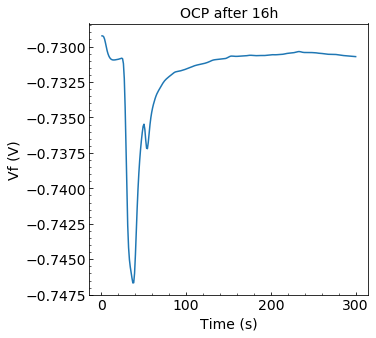

In [37]:
figOCP=plt.figure(figsize=(5,5))
plt.plot(OCP_array[:,1], OCP_array[:,2])
plt.xlabel('Time (s)')
plt.ylabel('Vf (V)')
plt.title('OCP after 16h')
plt.show()

## POTDYN plot:

In [38]:
POTDYN_label=[]
for each in POTDYN_filepath:
    POTDYN_label.append(each[each.rfind('/')+1:-4])
print(POTDYN_label)

['POTDYN']


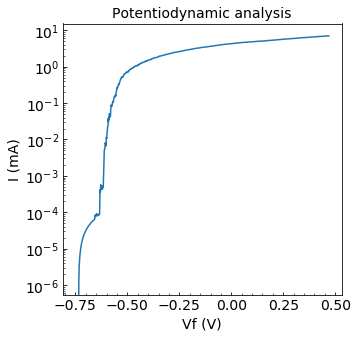

In [47]:
figPOTDYN=plt.figure(figsize=(5,5))
plt.plot(POTDYN_array[:,2], 1000*POTDYN_array[:,3])
plt.xlabel('Vf (V)')
plt.ylabel('I (mA)')
plt.yscale('log')
plt.title('Potentiodynamic analysis')
plt.show()